# Introduction to Python - Data Analysis with Pandas 

## Problem Set

In [1]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2017-05-29 11:15:54.550773


## Question 1

Run the following cell from the lecture to load the data on Bundesliga champions into a Pandas Series.

In [69]:
import pandas as pd
import seaborn
import numpy as np
import statsmodels.api as sm
Df = pd.read_csv('data/champions.csv')
ts = Df['Club']

OSError: File b'data/champions.csv' does not exist

(a) How many clubs became champion at least once? How often was Bayern Munich champion?

(b) Use a Pandas command to see the first year in the data set. 

(c) Write a function that takes the data set and a year as arguments and prints the champion in this particular year. Which club won the championship in 1998? 

(d) Print out all clubs that were champions more than three times.

(e) Write a function that takes a series and returns the club that has won the second-most championships since 1964. Hint: Useful for this question are the **value_counts** and **argmax** methods, and logical arrays.

(f) Generate a bar chart with all champions since 1963/64, analogous to the one in the lecture. 

Bonus challenge: Answer question (f) *without using Pandas' plot method*. Compare the lecture notebook for help. You will need to find a way to get a list of all clubs in the data set, with each club appearing only once.

In [70]:
## (a): This information is provided in the describe method; alternatively, you can use the value_counts method
print(ts.describe())
print('')

## (b) 
print('The first observation is from {}.'.format(ts.index[0]) )
print('')

## (c)
def get_champ(ts, year):
    print('In {}, {} was Bundesliga champion.'.format(year, ts[year]) )

get_champ(ts, 1998)    
print('')

## (d)
first = ts.value_counts()
print(first.loc[ first > 3 ])
print('')

## (e)
def second_most(series):
    s_max = series.max()
    return series[ series < s_max ].argmax()

print('{} has won the second-most championships since 1964.'.format(second_most(first) ) )


NameError: name 'ts' is not defined

In [ ]:
## question (d)
first = ts.value_counts()
first.plot(kind = 'bar', title = 'Number of Bundesliga Championships Since 1963/64')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

names = list(set(ts))
ts_num = ts.replace(names, range(0,len(names)))
count = ts_num.value_counts()

fig, ax = plt.subplots()
ax.bar(count.index, count)
ax.set_xticks(range(len(names)))
ax.set_xticklabels(names)
ax.set_title('Number of Bundesliga Championships Since 1963/64')

As an aside, if you don't the overlapping labels in the graph above, you can replace the names with abbreviations. here's a way to do this:

In [ ]:
labels = {'FC Bayern München': 'FCB', 'Hamburger SV': 'HSV', 'Borussia Mönchengladbach': 'BMG', \
          'Werder Bremen': 'SVW', '1. FC Kaiserslautern': 'FCK', 'VfL Wolfsburg': 'WOL', \
          'Borussia Dortmund': 'BVB', 'TSV 1860 München': '1860', '1. FC Köln': '1FC', '1. FC Nürnberg': 'FCN', \
          'Eintracht Braunschweig': 'EBR', 'VfB Stuttgart': 'VfB'}
label_names = [labels[name] for name in names]

fig, ax = plt.subplots()
ax.bar(count.index, count)
ax.set_xticks(range(len(names)))
ax.set_xticklabels(label_names, fontsize=10)
ax.set_title('Number of Bundesliga Championships Since 1963/64')

## Question 2

Run the cell below which imports the data set on Bundesliga players and performs an operation similar to the one in the lecture, to get a column with last names and a column with first names.

In [ ]:
df = pd.read_csv('data/BundesligaData.csv', sep = ';')

def reverse_name(name):
    L = name.split(" ")
    try:
        S = L[1] + " " + L[0]
    except:
        S = L[0]
    
    return S

df['name'] = df['name'].apply(reverse_name)
names = df['name'].str.split(expand=True)
# replace column 'name'
df['name'] = names[0]
## add column 'first name'
df['first_name'] = names[1]
## make name the index
df.set_index('name', drop = True, inplace = True)

(a) Who got the most scorer points in the 2016/17 season, and how many points did he get? A scorer point is awarded for both a goal and an assist.

(b) Are there any players in the data set that are younger than 25 and have scored more than 10 goals?

(c) At which positions do the players with the most red cards, the most yellow cards, and the most aerials won play?

(d) For the first five players, update the **'goals'** column with the the number of goals they scored on the matchday 34, namely {'Lewandowski' : 0, 'Aubameyang': 2, 'Mueller': 0, Costa': 0, 'Reus': 1}.


In [ ]:
## question (a)

## define a series called 'points'
points = df['goals'] + df['assists']
## use argmax and max methods
print(points.argmax() )
print(points.max())

In [ ]:
## question (b)
A = (df['age'] < 25) & (df['goals'] >= 10)
# print( A.any() )

list(df.loc[A].index)

In [ ]:
## question (c)
print( df['position'].loc[ df['red'].argmax() ] )
print( df['position'].loc[ df['yellow'].argmax() ] )
print( df['position'].loc[ df['aerialswon'].argmax() ] )

In [ ]:
## question (d)
goals_34 = {'Lewandowski' : 0, 'Aubameyang': 2, 'Mueller': 0, 'Costa': 0, 'Reus': 1}
goals_34 = pd.Series(goals_34)
df['goals'] = df['goals'].add(goals_34, fill_value = 0)
df.head()

## Question 3

The dataset used in this question comes from baseball, which may be a less-than exciting sport, but also one that generates a lot of data and is therefore very popular among (North American) data scientists. The file 'baseball_stats.csv' contains information on more than 18,000 players that have played in the US baseball league MLB at some point. The data includes the name, height and weight of a player, moreover its "handedness" (whether he bats with his left or right hand or both), his batting average (the percentage of at-bats in which he recorded a hit) and the number of home runs.

(a) Import the Pandas package and read the data in a Pandas dataframe. Use the **info** or the **head** method to make sure the data has been stored properly. 

(b) Find the player with the most homeruns in the history of the MLB. 

(c) How many players were recorded to be "switch hitters", i.e. to bat both left-handed or right-handed? Who has scored the most homeruns among this group?

(d) How often does an MLB player hit the ball on average? Using the **describe** method, you can see that the mean batting average is about 0.17. However, this includes a lot of players with an average of 0. Compute the mean batting average among those players who have actually hit something, i.e. with an average *greater than zero*.

(e) A popular question among baseball fans and analysts is whether there is a inherent difference in the batting performance between left- or right-handed batters. We can use a t-test to check the hypothesis that both groups come from the same population, i.e. that there is no systematic difference and all observed difference is due to sampling. Use the **ttest_ind** function in Scipy's **scipy.stats** module to compute a t-statistic under the null hypothesis
\begin{equation}
    \text{avg}_{LH} - \text{avg}_{RH} = 0.
\end{equation}
What can you conclude?


In [ ]:
## Question (a)

# import pandas as pd

df = pd.read_csv('data/baseball_stats.csv')
print(df.info())
print('')
print(df.head())

In [ ]:
## Question (b)
ind = df['HR'].argmax()
print('The player with the most HRs in the history of baseball is {}.'.format(df['name'].loc[ind]) )

## alternative: sort_values and use iloc
# df.sort_values(by = 'HR', ascending = False, inplace = True)
# print('The player with the most HRs in the history of baseball is {}.'.format(df['name'].iloc[0]) )



In [ ]:
## Question (c)
switch = df['handedness'] == 'B'
## create a data set consisting of switch hitters only
df_switch = df.loc[switch]
print('{} players were switch hitters.'.format( len(df_switch) ) )
print('Among those, the player with the most HRs is {}.'.format( df_switch['name'].loc[df_switch['HR'].argmax()] ) )

In [ ]:
## Question (d)
index = df['avg'] > 0
print('Among players with a non-zero batting average, the mean average is {:.3}.'.format(df['avg'].loc[index].mean()) )

In [ ]:
## Question (e)

# from scipy.stats import ttest_ind

## sample of batting averages for right-handed batters 
y0 = df['avg'].loc[df['handedness'].map(lambda x: x == 'R')]
## sample of batting averages for left-handed batters 
y1 = df['avg'].loc[df['handedness'].map(lambda x: x == 'L')]


stat = ttest_ind(y0, y1, equal_var = False)
print(stat)


## Question 4
This last question will be of a more open style. The idea is to use data from worldbank and perform some interesting analysis. There is a nice package called **wbdata**, which allows you to conveniently download all kinds of data from the worldbank to a pandas dataframe. We will give you only some hints here but refer to http://wbdata.readthedocs.io/en/latest/ for a description of the package and its use. The data can by downloaded and automatically stored in a dataframe. For using wbdata, you have to first install the package (in command window with "pip install wbdata") and then just import it by **import wbdata**.

(a) Download data on GPD ('NY.GDP.MKTP.KD'), GCF ('NE.GDI.TOTL.KD'), Emissions ('EN.ATM.GHGT.KT.CE'), Population ('SP.POP.TOTL') and store the data in a dataframe that you can work with afterwards. (Hint: As the dataframe will be multiindex, please use **df.unstack(level=0)**). Additionally, it might be easier to work with the data if you delete the name of the index by **del df.index.name**. We will use data from 1972 to 2012 in our analysis. If you are interested, you can play around with other time horizons as well.

(b) Write a function that computes the development of the phyisical capital stock from the annual investements in each country.

(c) Visualize the data: Plot a timeseries of the global GDP and global CO2 emissions (Use country name "World" to plot global values)

(d) Finally, we are going to make some regression analysis. Therefore, (d1) regresse the log of GDP over the log of population and log of capital stock, (d2) the log of GDP over the log of capital-population, (d3) the log of GDP the log of capital and the log of emissions, both substracted the population.


In [118]:
import wbdata
import pandas
import matplotlib.pyplot as plt

Executing the following script allows you to download data from the worldbank.
First, set up the countries that your are interested:

**countries = ["CL","UY","HU"]**
 
The, set up the indicator that you want to download, e.g.:
**indicators = {'NY.GNP.PCAP.CD':'GNI per Capita'}**


The load into data frame
**df = wbdata.get_dataframe(indicators, country=countries, convert_date=False)**

If you want to download just all countries, do not specify the country option
**df = wbdata.get_dataframe(indicators, convert_date=False)**


As df is "pivoted", pandas' unstack fucntion helps reshape it into something more useful for further analysis as we did not learn how to work with multiindex so far.
**dfu = df.unstack(level=0)**

Other interesting functions are the list of all topics available:
**wbdata.get_source()**
or the search function that allows you to search for specific data:
**wbdata.search_indicators("Population")**

In [119]:
# (a)

# wbdata.search_indicators("GDP")
# Hint: we use NY.GDP.MKTP.KD     
#EN.ATM.GHGT.KT.CE   	Total greenhouse gas emissions (kt of CO2 equivalent)
indicators={'NY.GDP.MKTP.KD':'gdp','NE.GDI.TOTL.KD':'gcf','EN.ATM.GHGT.KT.CE':'co2','SP.POP.TOTL':'pop'}
D = wbdata.get_dataframe(indicators, convert_date=False)
D=D.unstack(level=0)

In [120]:
start_year, end_year = '1972', '2012'
Y = D['gdp'].loc[start_year:end_year] * 1e-12
I = D['gcf'].loc[start_year:end_year] * 1e-12
E = D['co2'].loc[start_year:end_year] * 1e-6  ## convert emissions to Gt
H = D['pop'].loc[start_year:end_year] * 1e-9  ## convert population to billion

del Y.index.name
del I.index.name
del E.index.name
del H.index.name

In [121]:
# (b)
delta = 0.08
K = I.copy()
T = len(I)
for country in K:
    k0 = (D['gcf'][country].loc['1992':'1995']/D['gdp'][country].loc['1992':'1995']).mean() / delta \
            * D['gdp'][country].loc['1992'] * 1e-12
        
    K[country].iloc[0] = k0
    for t in range(T-1):
         K[country].iloc[t+1] = (1 - delta) * K[country].iloc[t] + I[country].iloc[t]

In [122]:
Y.describe()

C:\Users\huber\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


country,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Arab World,Argentina,Armenia,...,Uzbekistan,Vanuatu,"Venezuela, RB",Vietnam,Virgin Islands (U.S.),West Bank and Gaza,World,"Yemen, Rep.",Zambia,Zimbabwe
count,11.000000,33.000000,41.000000,11.000000,41.000000,28.000000,36.000000,38.000000,41.000000,23.000000,...,26.000000,34.000000,41.000000,29.000000,11.000000,19.000000,41.000000,23.000000,41.000000,41.000000
mean,0.012392,0.007316,0.099388,0.000601,0.002253,0.042953,0.000784,1.157816,0.268288,0.006189,...,0.024317,0.000457,0.269956,0.061334,0.004166,0.007104,41.458656,0.021011,0.010342,0.010932
std,0.003801,0.002442,0.034864,0.000027,0.000877,0.021349,0.000317,0.501574,0.077570,0.002652,...,0.008552,0.000140,0.070762,0.033427,0.000342,0.001936,14.578867,0.005773,0.004196,0.002735
min,0.008013,0.004037,0.044251,0.000552,0.001158,0.022177,0.000307,0.503996,0.181657,0.002980,...,0.016593,0.000239,0.170929,0.022467,0.003386,0.003621,20.901937,0.011726,0.007139,0.007070
25%,NaN,NaN,0.076732,NaN,0.001477,NaN,NaN,NaN,0.206455,NaN,...,NaN,NaN,0.216982,NaN,NaN,NaN,28.399966,NaN,0.007748,0.008460
50%,NaN,NaN,0.091260,NaN,0.002000,NaN,NaN,NaN,0.245192,NaN,...,NaN,NaN,0.258243,NaN,NaN,NaN,39.005315,NaN,0.008388,0.010500
75%,NaN,NaN,0.120126,NaN,0.002943,NaN,NaN,NaN,0.305641,NaN,...,NaN,NaN,0.296839,NaN,NaN,NaN,51.948794,NaN,0.010876,0.012857
max,0.019352,0.012405,0.171467,0.000632,0.004022,0.090121,0.001390,2.292971,0.449062,0.010554,...,0.046090,0.000722,0.433329,0.129629,0.004606,0.011009,69.544746,0.030907,0.023019,0.015913


In [123]:
## check for NaNs
print(Y.notnull().all().all(), I.notnull().all().all())

False False


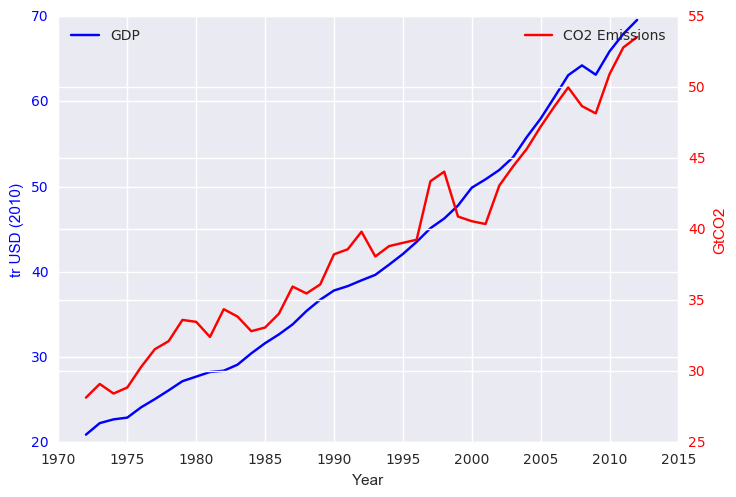

In [124]:
# (c)
# Visualize data
fig, ax1 = plt.subplots()
ax1.plot(Y['World'], color = 'b', label = "GDP")
ax2 = ax1.twinx()
ax2.plot(E['World'], color = 'r', label = 'CO2 Emissions')

ax1.set_xlabel('Year')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('tr USD (2010)', color='b')
ax1.tick_params('y', colors='b')

ax2.set_ylabel('GtCO2', color='r')
ax2.tick_params('y', colors='r')
ax1.legend(loc = 'upper left')
ax2.legend()
plt.show()


In [125]:
#(d)
## convert data to np array

X = np.column_stack( ( np.log(K['World']), np.log(H['World']) ) )
X = sm.add_constant(X)
y = np.log(Y['World'])

res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  World   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     6839.
Date:                Wed, 31 May 2017   Prob (F-statistic):           2.56e-49
Time:                        14:48:47   Log-Likelihood:                 105.24
No. Observations:                  41   AIC:                            -204.5
Df Residuals:                      38   BIC:                            -199.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.3048      0.104     -2.921      0.0

In [126]:
y = np.log(Y['World']) - np.log(H['World'])

t = np.array(range(len(y)))
X = np.column_stack( (np.log(K['World']) - np.log(H['World']), t) )
X = sm.add_constant(X)

res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  World   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     1972.
Date:                Wed, 31 May 2017   Prob (F-statistic):           4.12e-39
Time:                        14:48:47   Log-Likelihood:                 109.45
No. Observations:                  41   AIC:                            -212.9
Df Residuals:                      38   BIC:                            -207.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.4327      0.074     19.268      0.0

In [127]:
y = np.log(Y['World']) - np.log(H['World'])

t = np.array(range(len(y)))
X = np.column_stack( (np.log(K['World']) - np.log(H['World']), np.log(E['World']) - np.log(H['World']), t) )
X = sm.add_constant(X)

res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  World   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     1536.
Date:                Wed, 31 May 2017   Prob (F-statistic):           7.30e-39
Time:                        14:48:47   Log-Likelihood:                 113.16
No. Observations:                  41   AIC:                            -218.3
Df Residuals:                      37   BIC:                            -211.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.1401      0.128      8.902      0.0